In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Read Bastman details file
mydata = pd.read_csv('Batsman.csv')

In [4]:
# View first 5 rows
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [5]:
#Checking Info
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [6]:
#Shape of the data
mydata.shape

(208, 7)

In [7]:
#Null Value Check
mydata.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [8]:
# Descriptive summary
mydata.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [9]:
# Descriptive summary for Numeric and Categorical variables
mydata.describe(include="all")

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


## Q-1 What is the percentage for Kohli being Not Out.


In [11]:
mydata['Dismissal'].value_counts()

Caught        121
NO             37
Bowled         21
LBW            12
Run out        12
Stumped         4
Hit wicket      1
Name: Dismissal, dtype: int64

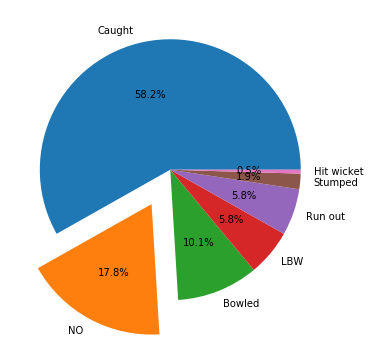

In [27]:
plt.figure(figsize = (6,6))
plt.pie(mydata['Dismissal'].value_counts(),labels = mydata['Dismissal'].value_counts().index
        ,autopct = '%0.1f%%',explode =(0,0.30,0,0,0,0,0))
plt.show()

## Q-2 Find the number of times when kohli scored less than or equal to 7 runs?

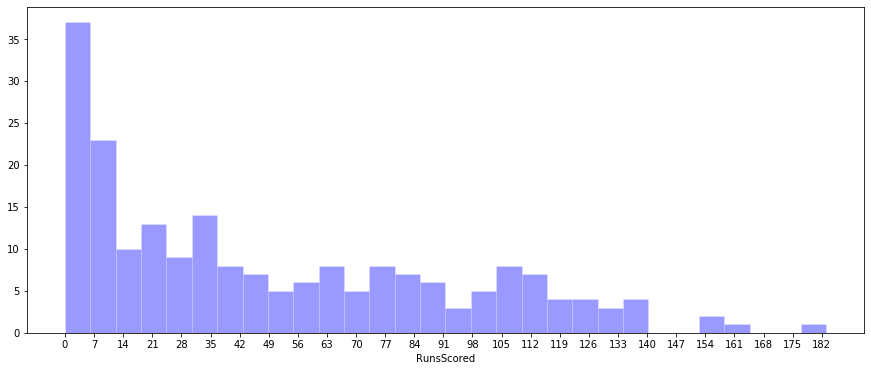

In [35]:
plt.figure(figsize=(15,6))
sns.distplot(mydata['RunsScored'],bins = 30,color = 'b',kde=False,hist_kws = {'linewidth' :0.5,'edgecolor' : 'white'})
plt.xticks(np.arange(0,183,7))
plt.show()

## Q.4 Use Boxplot to tell the IQR( Inter Quartile Range) middle 50% of runs scored by Kohli?



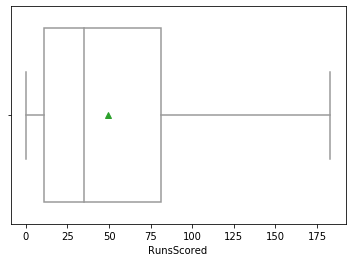

In [43]:
sns.boxplot(mydata['RunsScored'],showmeans = True,color = 'white')

In [51]:
q1 = mydata['RunsScored'].quantile(.25) #q1

In [53]:
q3 = mydata['RunsScored'].quantile(.75) #q3

In [55]:
q3-q1

70.5

## Q. What is the best way that the opposition team bowlers can get Kohli out?

How Kohli got dismissed most of the times?



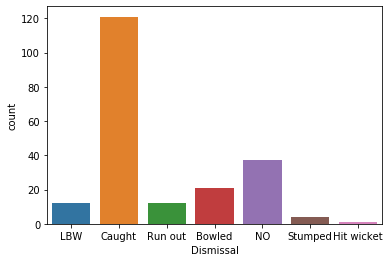

In [56]:
sns.countplot(mydata['Dismissal'])
plt.show()

## Q. Against which opposition team Kohli has played the most in his career?


In [58]:
mydata['Opposition'].value_counts()

Sri Lanka       45
West Indies     32
England         29
Australia       26
South Africa    24
New Zealand     19
Pakistan        12
Bangladesh      11
Zimbabwe         6
Ireland          2
Netherlands      1
U.A.E.           1
Name: Opposition, dtype: int64

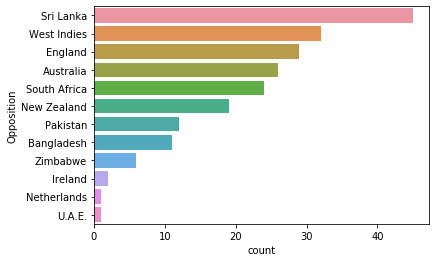

In [65]:
sns.countplot(y = mydata['Opposition'],order = mydata['Opposition'].value_counts().index)
plt.show()

## Q. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.


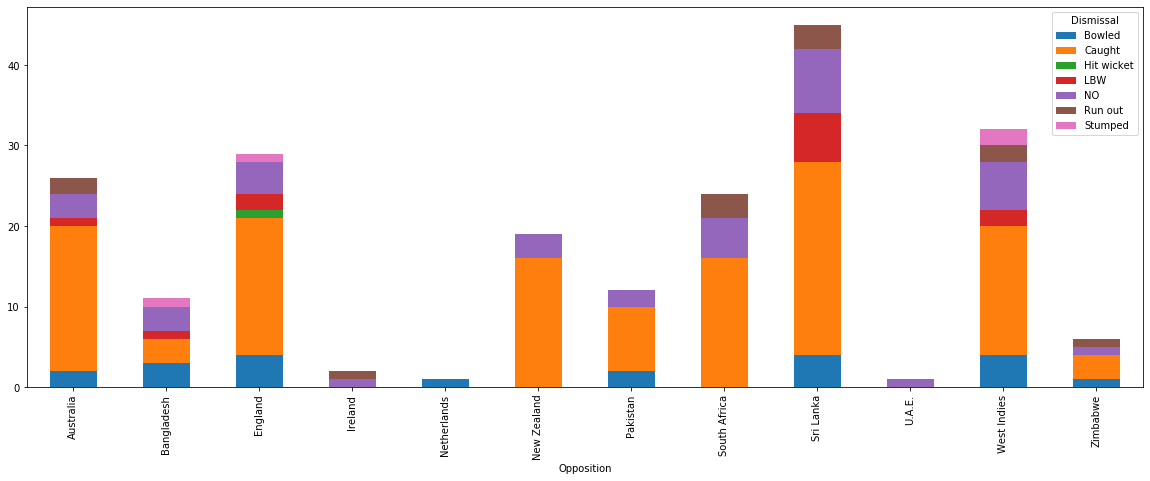

In [87]:
ct = pd.crosstab(mydata['Opposition'],mydata['Dismissal'],margins =True)
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

## Q. Which opposition has Kohli scored most runs against? Find the median score against different oppositions and use a boxplot to represent it?


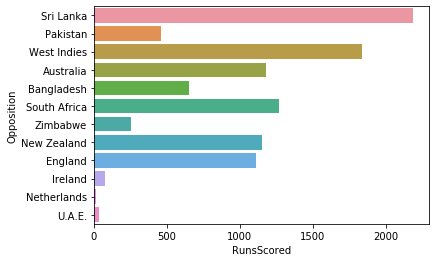

In [100]:
sns.barplot(y = mydata['Opposition'],x = mydata['RunsScored'],ci = None,estimator=np.sum)
plt.show()

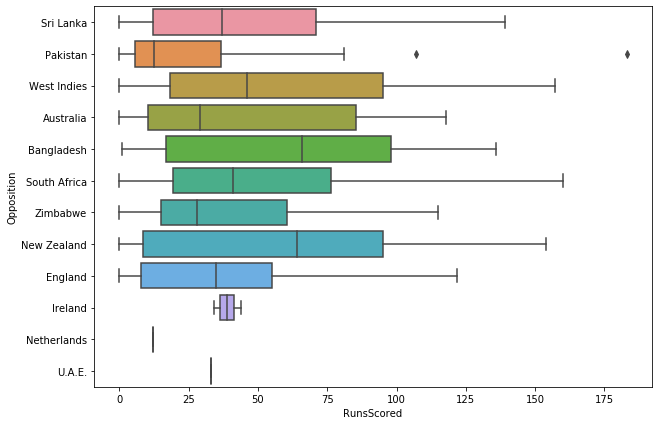

In [104]:
plt.figure(figsize=(10,7))
sns.boxplot(y = mydata['Opposition'],x = mydata['RunsScored'])
plt.show()

## Q. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.


In [105]:
mydata['Inning'].value_counts()

2    118
1     90
Name: Inning, dtype: int64

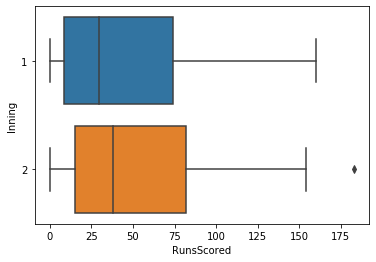

In [110]:
sns.boxplot(y = mydata['Inning'],x = mydata['RunsScored'],orient= 'h')
plt.show()

Adding a column giving true for those rows which represent post transformation 

In [111]:
mydata['post_transform'] = mydata["Year"]>2012

## Use a Boxplot to compare the runs Scored before and after transformation


In [112]:
mydata['pre_tranform'] = mydata['Year']<2012

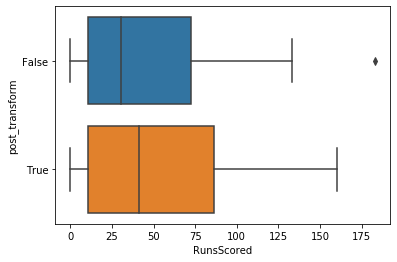

In [117]:
sns.boxplot(x = mydata['RunsScored'],y = mydata['post_transform'],orient='h')
plt.show()

## Use a Boxplot to compare the Balls Faced before and after transformation

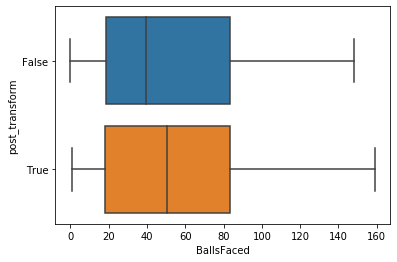

In [119]:
sns.boxplot(x = mydata['BallsFaced'],y = mydata['post_transform'],orient='h')
plt.show()

## Use a Boxplot to compare the runs Scored before and after transformation with Hue as innings(innings wise)


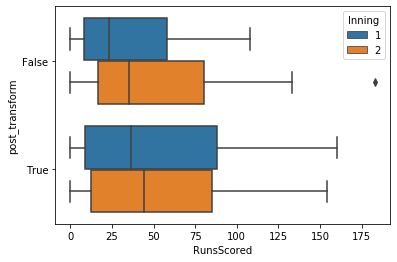

In [123]:
sns.boxplot(x = mydata['RunsScored'],y = mydata['post_transform'],orient='h',hue = mydata['Inning'])

## Use a bar plot to compare the dismissal patterns before and after transformation.


In [128]:
pd.crosstab(index = mydata['post_transform'],columns=mydata['Dismissal'],values=mydata['RunsScored']
           ,margins=True,aggfunc='mean')

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped,All
post_transform,,,,,,,,
False,27.454545,42.000000,107.0,23.750000,82.166667,42.0,16.5,44.159091
True,56.400000,42.397260,NaN,40.000000,80.480000,50.0,107.5,52.883333
All,41.238095,42.239669,107.0,29.166667,81.027027,46.0,62.0,49.192308


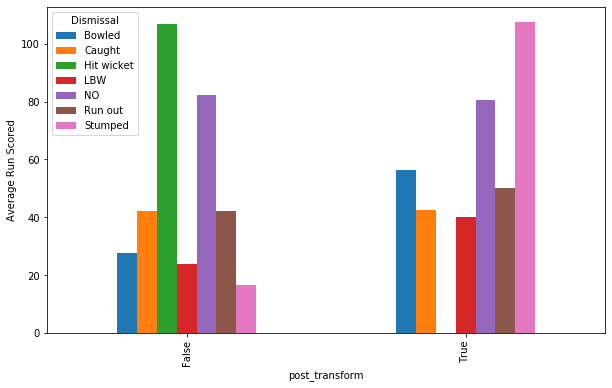

In [134]:
cd = pd.crosstab(index = mydata['post_transform'],columns=mydata['Dismissal'],values=mydata['RunsScored']
                ,margins=True,aggfunc='mean')
cd.drop('All',inplace = True)
cd.drop('All',axis = 1,inplace = True)
cd.plot.bar(figsize=(10,6))
plt.ylabel('Average Run Scored')
plt.show()

## Use Pointplot to Visualize Yearly trend in run scored by Virat Kohli


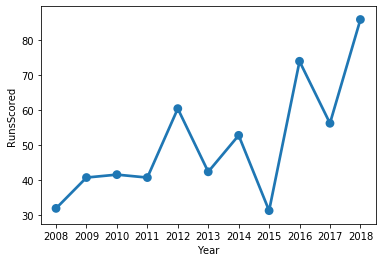

In [137]:
sns.pointplot(mydata['Year'],mydata['RunsScored'],ci = None)
plt.show()

## Can we say there is a  linear relationship between RunsScored & BallsFaced over different batting positions?


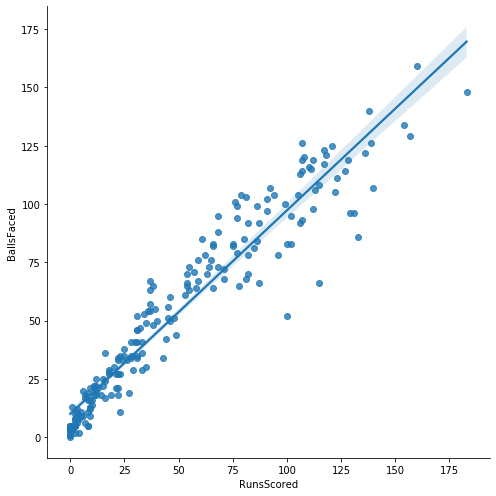

In [159]:
sns.lmplot(x = 'RunsScored',y = 'BallsFaced',data = mydata,height=7)
plt.show()

## How the batting position has changed with different oppositions yearly?


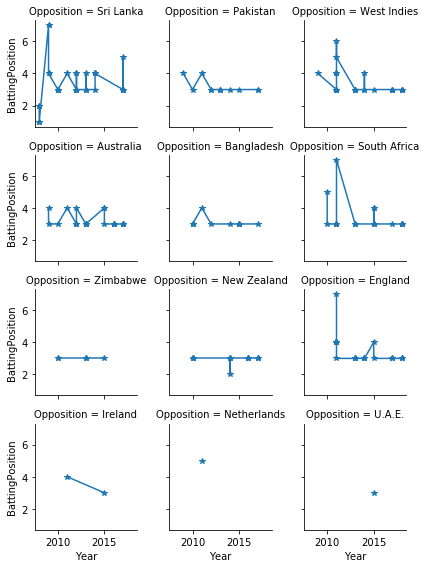

In [166]:
g = sns.FacetGrid(mydata,col='Opposition',col_wrap=3,height=2)
g = g.map(plt.plot,'Year','BattingPosition',marker='*')
plt.show()